# 2. Exploratory Data Analysis

Lets explore the data to better understand its characteristics. For this analysis, we will use the data prepared previously.

As first step lets import the dataset

## 2.1 Import prepared dataset

In [103]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

df_final = pd.read_csv('../data/final_data_2010_2021.csv')
df_final['DATETIME'] = pd.to_datetime(df_final['DATETIME'], format='%Y-%m-%d  %H:%M:%S')
df_final.drop(df_final[df_final['DATETIME'].dt.date >= dt.date(2021, 1, 1)].index, inplace = True)
df_final.set_index('DATETIME', inplace=True)
print(df_final)

                     TOTALDEMAND  TEMPERATURE  HOLIDAY  SUMMER  AUTUMN  \
DATETIME                                                                 
2010-01-01 00:00:00      8038.00         23.1        1       1       0   
2010-01-01 00:30:00      7809.31         22.9        1       1       0   
2010-01-01 01:00:00      7483.69         22.6        1       1       0   
2010-01-01 01:30:00      7117.23         22.5        1       1       0   
2010-01-01 02:00:00      6812.03         22.5        1       1       0   
...                          ...          ...      ...     ...     ...   
2020-12-31 21:30:00      7072.75         20.1        0       1       0   
2020-12-31 22:00:00      7062.97         19.9        0       1       0   
2020-12-31 22:30:00      7172.60         19.6        0       1       0   
2020-12-31 23:00:00      7125.65         19.3        0       1       0   
2020-12-31 23:30:00      7080.04         19.6        0       1       0   

                     WINTER  SPRING  

## 2.2 Analyse the Demand Data

### 2.2.1 Yearly demand

Analyse the electricity demand over the years. This is important factor as to whether we should use entire dataset for model build or whether we should only use recent data. Lets review Mean, Minimum and Maximum demand fluctuation over the years.

Minimum and maximum demeand seem to have oscillated within a range whilst it is evident that the mean or the averge demand has reduced or flat lined over the years. This is an interesting finding as we would expect the demand to rise with the population increase over the years. 

**Therefore it is prudent to use most recent demand data for the model build.**

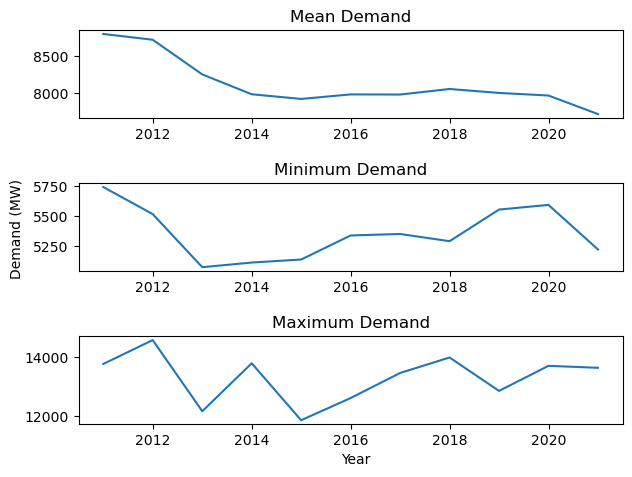

In [105]:
import numpy as np

fig, axis = plt.subplots(3)#, sharex=True)

year_mean = df_final.resample('Y')['TOTALDEMAND'].mean()
year_max = df_final.resample('Y')['TOTALDEMAND'].max()
year_min = df_final.resample('Y')['TOTALDEMAND'].min()

#print(year_mean)
axis[0].plot(year_mean)
axis[1].plot(year_min)
axis[2].plot(year_max)
axis[0].set_title("Mean Demand")
axis[1].set_title("Minimum Demand")
axis[2].set_title("Maximum Demand")

fig.text(0.55, 0.01, 'Year', ha='center')
fig.text(0.01, 0.5, 'Demand (MW)', va='center', rotation='vertical')
fig.tight_layout(pad=1.5)

<i> Note: A potential reason for decrease in demand could be the increase use of roof top solar panels. Below graph from Australian PV Institute https://pv-map.apvi.org.au/analyses shows a clear increase of Solar panel installations. Howeve further research is required to confirm any relationship. </i>

<img src="AusPVInst.PNG" width="500" height="340"> 

### 2.2.2 Monthly Demand

Lets analyse the impact of demand based on the month. We tend to use heating during winter months and cooling during summer. The heatmap clearly indicates that June, July, August winter months and January, February Summer months have a higher average demand for electricity. Conversely Spring and Autumn has a lower average demand. Therefore the month/season should be considered for the model build.

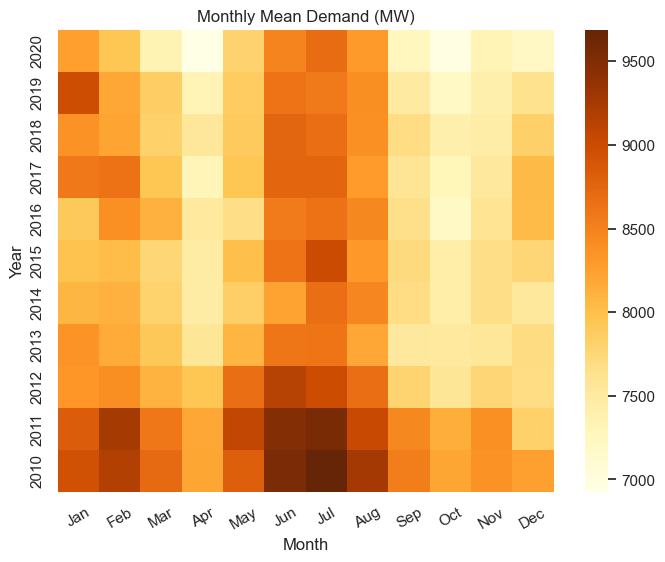

In [181]:
import seaborn as sns

#create a dataframe for monthly demand
df_md = df_final.copy()
#add year column
df_md['YEAR'] = df_md.index.year

# Create a Pivot Table where Mean demand is calculated with Year, Month)
hm_pt = pd.pivot_table(df_md,values ='TOTALDEMAND', index=['YEAR'], columns='MONTH', aggfunc='mean')
# Plot the Heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hm_pt, cmap="YlOrBr")
plt.xticks(rotation=30)
ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.invert_yaxis()
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_title('Monthly Mean Demand (MW)')
plt.show()

### 2.2.3 Day of the week Demand

Next we analyse whether the demand fluctuate depending on the day of the week. As per the heatmap, weekends tend to have lower demand. This could be due to the fact that most offices, factories are closed during the weekend. Also, many people tend to spend weekends outside. Similar to month, day of the week seems to have an influence on the demand. Hence suitable to be included in the model build.

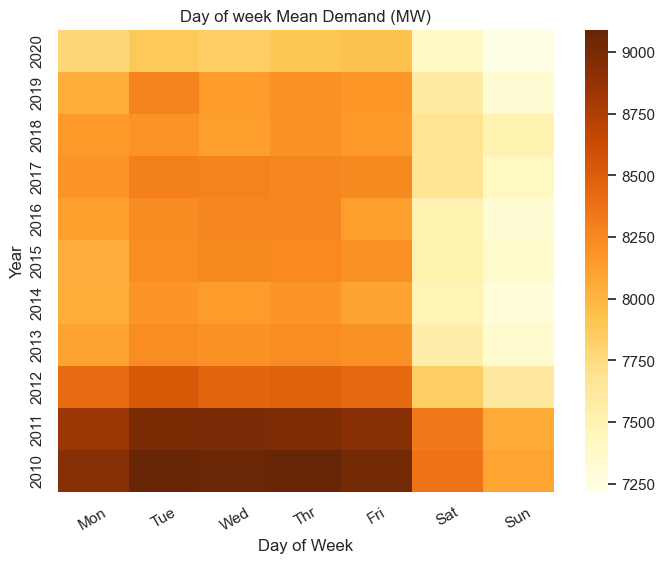

In [182]:
#create a dataframe for day of week demand
df_dow = df_final.copy()
#add year column
df_dow['YEAR'] = df_dow.index.year

# Create a Pivot Table where Mean demand is calculated with Year, Month)
hm_pt = pd.pivot_table(df_dow,values ='TOTALDEMAND', index=['YEAR'], columns='DAYOFWEEK', aggfunc='mean')

# Plot the Heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hm_pt, cmap="YlOrBr")
plt.xticks(rotation=30)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Year")
ax.invert_yaxis()
ax.set_xticklabels(['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])
ax.set_title('Day of week Mean Demand (MW)')
plt.show()

### 2.2.4 Holiday Demand

Extending on the day of the week demand, we would like to analyse the difference in average demand between holidays and non-holidays.
For this we consider Public holidays and Weekends as "Holidays" and all the other days as non-holidays.

The graph clearly indicate a significant difference in mean demand between holidays and non-holidays. As noted previously for Saturday and Sunday, this may be due the fact that offices, factories not operating over holidays resulting in lower demand. Therefore we could conclude that holidays has a impact on the overall demand and therefore should be considered in the model.

           TOTALDEMAND
DAYOFWEEK             
0          8241.197088
1          8372.145778
2          8341.364623
3          8363.653176
4          8319.818424
5          7750.566764
6          7526.180921


C:\Users\rishantha\AppData\Local\Temp\ipykernel_22408\1688542065.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['oo','Mon','Tue','Wed','Thr','Fri','Sat','Sun'])


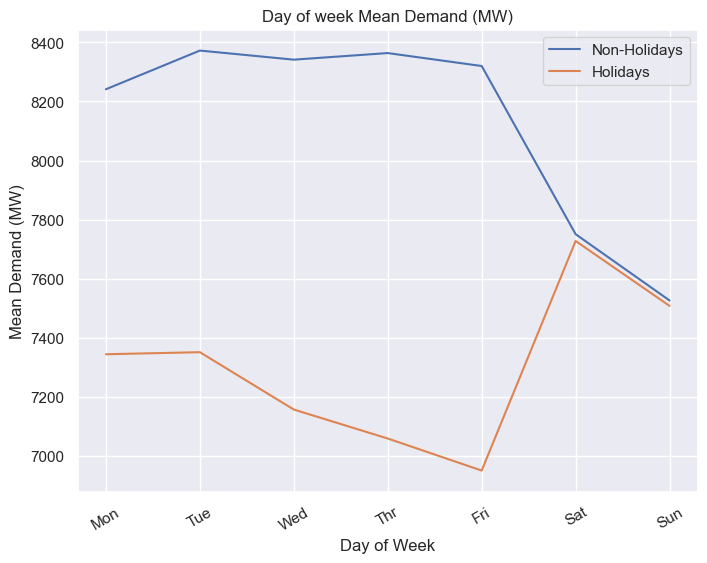

In [177]:
fig, ax = plt.subplots(figsize=(8,6))

rslt_df0 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[(df_final['HOLIDAY'] == 0) | (df_final['DAYOFWEEK'] < 5)]
rslt_df1 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[(df_final['HOLIDAY'] == 1) | (df_final['DAYOFWEEK'] > 4)]

ax.plot(rslt_df0.groupby('DAYOFWEEK').mean())
ax.plot(rslt_df1.groupby('DAYOFWEEK').mean())

plt.xticks(rotation=30)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Mean Demand (MW)")

ax.set_xticklabels(['oo','Mon','Tue','Wed','Thr','Fri','Sat','Sun'])
ax.set_title('Day of week Mean Demand (MW)')
plt.legend(["Non-Holidays", "Holidays"])
plt.show()

### 2.2.5 Hour of the Day Demand

At the next granular level, we would like to observe how demand fluctuates within a day (hour by hour). Australian energy providers broadly segregates hourly demand to three groups (https://www.canstarblue.com.au/electricity/peak-off-peak-electricity-times/). Peak, off-peak and shoulder. There are variations of this by providers. For our analysis purposes, we would simplify to Peak and Off-peak only. As evident from the graph, approx from 7:00 AM to 10:00 PM, the demand seems to be high. Therefore we would use that period as Peak demand and rest as off-peak demand for our model build.

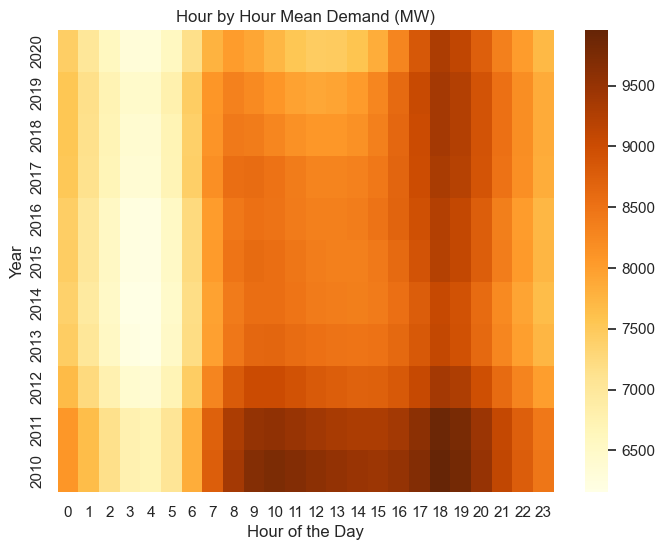

In [180]:
#create a dataframe for day of week demand
df_hd = df_final.copy()
#add year column
df_hd['YEAR'] = df_hd.index.year

# Create a Pivot Table where Mean demand is calculated with Year, Month)
hm_pt = pd.pivot_table(df_hd,values ='TOTALDEMAND', index=['YEAR'], columns='HOUR', aggfunc='mean')

# Plot the Heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hm_pt, cmap="YlOrBr")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Year")
ax.invert_yaxis()
ax.set_title('Hour by Hour Mean Demand (MW)')
plt.show()

### 2.2.6 Peak vs Off-peak demand

Based on previous analysis, lets verify the variations in demand based on Peak hours vs off-peak. Additionally, we further drill-down on holidays vs non-holidays. The graphs clearly indicate the difference in demand between peak and off-peak hours. This pattern is visible both during non-holidays and holidays. Therefore we should consider Peak/Off-Peak demand in the model build.

Text(0.01, 0.5, 'Demand (MW)')

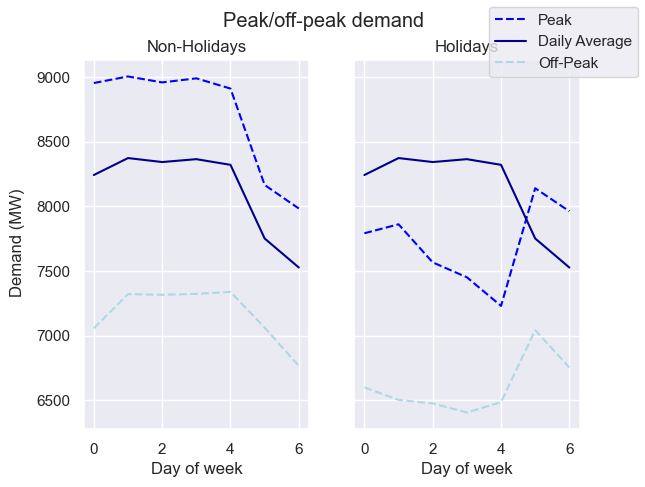

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)

rslt_df0 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[((df_final['HOLIDAY'] == 0) | (df_final['DAYOFWEEK'] < 5)) & (df_final['PEAK']==1)]
rslt_df1 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[((df_final['HOLIDAY'] == 0) | (df_final['DAYOFWEEK'] < 5))]
rslt_df2 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[((df_final['HOLIDAY'] == 0) | (df_final['DAYOFWEEK'] < 5)) & (df_final['PEAK']==0)]
rslt_df3 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[((df_final['HOLIDAY'] == 1) | (df_final['DAYOFWEEK'] > 4)) & (df_final['PEAK']==1)]
rslt_df4 = df_final[['DAYOFWEEK','TOTALDEMAND']].loc[((df_final['HOLIDAY'] == 1) | (df_final['DAYOFWEEK'] > 4)) & (df_final['PEAK']==0)]


ax1.plot(rslt_df0.groupby('DAYOFWEEK').mean(), color='blue', linestyle='--')
ax1.plot(rslt_df1.groupby('DAYOFWEEK').mean(), color='darkblue')
ax1.plot(rslt_df2.groupby('DAYOFWEEK').mean(), color='lightblue', linestyle='--')
ax1.set_xlabel("Day of week")

ax2.plot(rslt_df3.groupby('DAYOFWEEK').mean(), color='blue', linestyle='--')
ax2.plot(rslt_df1.groupby('DAYOFWEEK').mean(), color='darkblue')
ax2.plot(rslt_df4.groupby('DAYOFWEEK').mean(), color='lightblue', linestyle='--')
ax2.set_xlabel("Day of week")

ax1.set_title("Non-Holidays")
ax2.set_title("Holidays")

fig.suptitle('Peak/off-peak demand')
fig.legend(['Peak','Daily Average','Off-Peak'])
fig.text(0.01, 0.5, 'Demand (MW)', va='center', rotation='vertical')

